<a href="https://colab.research.google.com/github/fclubb/EarthSurfaceProcesses/blob/master/Week6_ErosionRates/Part2_plotting_ANSWERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2: plotting erosion rates - Walkthrough



*This lesson has been written Fiona Clubb at Durham University*

## Get the right python packages

In this first cell we're going to install `lsdtopotools` and `lsdviztools`.
**WARNING - the first time you do this, it might take a few minutes. Just wait for it to finish and then you don't have to run it again for the rest of the practical.**



First we install the gdal command line tools, which we use later. These have a bunch of useful ways to maniupulate topographic data.

In [1]:
!apt-get install gdal-bin &> /dev/null

Now we need to install lsdtopotools. We get the package from a server at the University of Edinburgh and then install.

In [2]:
# download lsdtt-basic-metrics and make available
!apt-get install libfftw3-dev &> /dev/null
!wget https://www.geos.ed.ac.uk/~smudd/lsdtt_dev_ubuntu/lsdtt-basic-metrics
!mv lsdtt-basic-metrics /usr/local/sbin/
!chmod 777 /usr/local/sbin/lsdtt-basic-metrics

--2026-02-16 10:48:49--  https://www.geos.ed.ac.uk/~smudd/lsdtt_dev_ubuntu/lsdtt-basic-metrics
Resolving www.geos.ed.ac.uk (www.geos.ed.ac.uk)... 129.215.8.163
Connecting to www.geos.ed.ac.uk (www.geos.ed.ac.uk)|129.215.8.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4386088 (4.2M)
Saving to: ‘lsdtt-basic-metrics’

lsdtt-basic-metrics 100%[===================>]   4.18M  4.82MB/s    in 0.9s    

2026-02-16 10:48:52 (4.82 MB/s) - ‘lsdtt-basic-metrics’ saved [4386088/4386088]



In [3]:
# download lsdtt-chi-mapping and make available
!wget https://www.geos.ed.ac.uk/~smudd/lsdtt_dev_ubuntu/lsdtt-chi-mapping
!mv lsdtt-chi-mapping /usr/local/sbin/
!chmod 777 /usr/local/sbin/lsdtt-chi-mapping

--2026-02-16 10:48:54--  https://www.geos.ed.ac.uk/~smudd/lsdtt_dev_ubuntu/lsdtt-chi-mapping
Resolving www.geos.ed.ac.uk (www.geos.ed.ac.uk)... 129.215.8.163
Connecting to www.geos.ed.ac.uk (www.geos.ed.ac.uk)|129.215.8.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4109552 (3.9M)
Saving to: ‘lsdtt-chi-mapping’

lsdtt-chi-mapping   100%[===================>]   3.92M  4.56MB/s    in 0.9s    

2026-02-16 10:48:55 (4.56 MB/s) - ‘lsdtt-chi-mapping’ saved [4109552/4109552]



This is to install the python wrapper that makes topographic analysis routines python-friendly.  

In [4]:
!pip install lsdviztools &> /dev/null

The next line tests to see if it worked. If you get some output asking for a parameter file then lsdtopotools is installed. This notebook was tested on version 0.9.

In [5]:
!lsdtt-basic-metrics -v

|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| http://doi.org/10.5281/zenodo.4577879               ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| This is LSDTopoTools2 version                       ||
|| 0.10d
|| If the version number has a d at the end it is a    ||
||  development version.                               ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can find some examples of usage here:           ||
|| ht

Install Geopandas from source to fix issue with spatial joining later on:

In [6]:
!apt install python-gdal python3-gdal &> /dev/null\n
# Install rtree - Geopandas requirement\n
!apt install python3-rtree &> /dev/null\n
# Install Geopandas\n
!pip install git+git://github.com/geopandas/geopandas.git &> /dev/null\n
# Install descartes - Geopandas requirement\n"
!pip install descartes &> /dev/null

Import required packages that we need:

In [7]:
#lsdtopotools
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw

#pandas
import pandas as pd
import geopandas as gpd

#colab
from google.colab import files

# statistics
from scipy import stats
import scipy.optimize

#general
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline



---


## Exercise 1

* Think about what these statistics are telling you. Can these data be explained well with a linear regression model?

The code below reads in the shapefile and makes the plot of mean basin slope vs erosion rate, before fitting a linear regression. You should be able to see that there is not a strong fit of the regression - the $R^2$ value is 0.22, which means that a linear fit only explains 22% of the variance in the dataset. The p value tells you the significance of this relationship, i.e. it is testing the null hypothesis that there is no relationship between mean basin slope and erosion rate. A p value of < 0.05 means that we can say there is a relationship to a 95% confidence level. Our p value is 0.0002. We can therefore be confident that there is a relationship between slope and erosion rate, but it is not well explained by a linear regression model.

In [ ]:
# Read in the shapefile to a geopandas dataframe
shapefile_name = 'Great_Smoky_Mts_basins_slope.shp'
gdf = gpd.read_file(shapefile_name)

Text(0, 0.5, 'Catchment-averaged\n erosion rate (mm/kyr)')

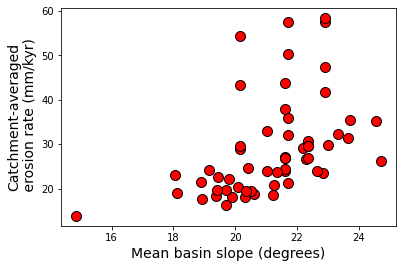

In [ ]:
# make a scatter plot using matplotlib. The first parameter in the brackets is the X data, and the second is the Y data.
# You can change the column names from the geopandas table to choose what you want to plot.
# Here I am plotting erosion rate (EBE_MMKYR) and the mean basin slope that we calculated (MEAN).
# You can change the fill colour of the marker using 'color', the edge color using 'edgecolors', and the size using 's'
plt.scatter(gdf['MEAN'], gdf['EBE_MMKYR'], color = 'red', edgecolors='black', s=100)
plt.xlabel('Mean basin slope (degrees)', fontsize=14)
plt.ylabel('Catchment-averaged\n erosion rate (mm/kyr)', fontsize=14)

In [ ]:
# set the X and Y data for the linear regression
x = gdf['MEAN'].values
y = gdf['EBE_MMKYR'].values

# do the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# print out the equation of the line. We will round to 2 decimal places
print ('y = {}x + {}'.format(round(slope,2), round(intercept,2)))

# print out the R^2 value and the p value
print ('R^2: ', r_value**2)
print ('p value: ', p_value)

y = 2.98x + -34.24
R^2:  0.2210018837768523
p value:  0.00019651689874823083


* Look at Figure 2 of Binnie et al. (2007):
Steven A. Binnie, William M. Phillips, Michael A. Summerfield, L. Keith Fifield; Tectonic uplift, threshold hillslopes, and denudation rates in a developing mountain range. _Geology_ 2007; 35 (8): 743–746. doi: https://doi.org/10.1130/G23641A.1


* How does your data compare to their plot? Does it look similar?

From looking at this figure, you should see that we get quite a similar relationship between slope and erosion rate, although we perhaps have more scatter in the data compared to their plot:

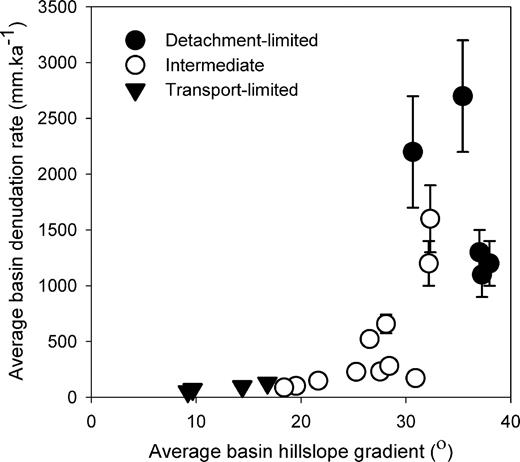


* Write a few sentences to explain why we might expect mean basin slope to be limited at high erosion rates.

At low erosion rates, hillslopes are transport limited: where slopes are low, transport is slow and therefore we develop thick soils. In these regimes hillslope sediment transport is following the linear sediment flux law. However, at high slopes, when we get close to the angle of repose, sediment transport becomes non-linear: sediment can be transported as fast as it is produced (detachment limited). This means that slopes tend to be maintained at this threshold angle and do not keep increasing with erosion rate.

---



---


## Exercise 2

* Download the file `Great_Smoky_Mts_MChiSegmented.geojson` and load into ArcGIS using the JSON to Features tool. Make a figure of the channel network coloured by channel steepness (the m_chi column) across the landscape. Write a short caption that explains how channel steepness varies across the landscape.

I ran the channel steepness analysis using this code block and then downloaded the geojson to open in ArcGIS.


In [ ]:
# SET THE NAME OF YOUR DEM HERE
DEM_name = 'Great_Smoky_Mts'

command_line_tool = "lsdtt-chi-mapping"
lsdtt_parameters = {"print_segmented_M_chi_map_to_csv" : "true",
                    "print_basin_raster" : "true",
                    "convert_csv_to_geojson" : "true",
                    "threshold_contributing_pixels": "100"}

lsdtt_drive = lsdmw.lsdtt_driver(command_line_tool,read_prefix = DEM_name,
                                 write_prefix= DEM_name,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-chi-mapping
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Great_Smoky_Mts
The write prefix is: Great_Smoky_Mts
The parameter dictionary is:
{'print_segmented_M_chi_map_to_csv': 'true', 'print_basin_raster': 'true', 'convert_csv_to_geojson': 'true', 'threshold_contributing_pixels': '100'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


------------------
## Exercise 3

1. Make a figure that shows the relationship between channel steepness, mean basin slope and catchment-averaged erosion rate for the basins. Write a short figure captions that explains what the figure shows and what it means for the relationship between topographic form and erosion rate.

_I used the code blocks below to create the figures. In your figure caption you could write something about how mean basin slope appears to correlate well with erosion rates at relatively low erosion rates, but is limited at high erosion rates. Channel steepness tends to increase at high erosion rates but there is a lot of noise in the dataset._


In [ ]:
# Load in the channel steepness data to a geopandas geodataframe
channel_gdf = gpd.read_file('Great_Smoky_Mts_MChiSegmented.geojson')

# convert this to the same coordinate system as the erosion rate data
target_crs = gdf.crs
channel_gdf = channel_gdf.to_crs(target_crs)

# Use a spatial join to merge the channel steepness data with the erosion rate data
new_gdf = gpd.sjoin(gdf, channel_gdf, how='left')

In [ ]:
mean_steepness = new_gdf.groupby('OBSID2')['m_chi'].agg({'mean', 'std'}).reset_index().rename(columns={'mean': 'mean_steepness', 'std': 'std_steepness'})
gdf = gdf.merge(mean_steepness, on='OBSID2')

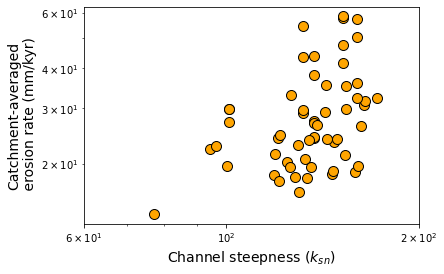

In [ ]:
# plot the data
plt.scatter(gdf['mean_steepness'], gdf['EBE_MMKYR'], color='orange', edgecolors='black', s=100)
# add the axes labels
plt.xlabel('Channel steepness ($k_{sn}$)', fontsize=14)
plt.ylabel('Catchment-averaged\n erosion rate (mm/kyr)', fontsize=14)

# change to a log scale and set the ticklabels for the x axis
plt.xscale('log')
plt.xticks([60, 100, 200])
plt.yscale('log')

In [ ]:
# remove nans from the dataframe
gdf = gdf[np.isnan(gdf['mean_steepness']) == False]

# set the X and Y data for the linear regression
x = gdf['mean_steepness']
y = gdf['EBE_MMKYR']

# do the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# print out the equation of the line. We will round to 2 decimal places
print ('y = {}x + {}'.format(round(slope,2), round(intercept,2)))

# print out the R^2 value and the p value
print ('R^2: ', r_value**2)
print ('p value: ', p_value)

y = 0.21x + 0.38
R^2:  0.1478912928186272
p value:  0.002877259572814068


2. Neither of these metrics seem to correlate particularly well with erosion rate in this landscape. Write down some reasons why you think this might be the case. You could think about i) the range of erosion rates measured; ii) the influence of climate, tectonics, lithology; iii) the influence of sediment.

_In the case of this landscape, we only span erosion rates from ~14 to 58 mm/yr, whereas there is a much bigger range of erosion rates across landscapes from 0.01 mm/yr to > 100 mm/yr! So if we wanted to test either metric properly, we'd probably need to get a wider range of erosion rates._

_You could do some reading from this area to determine whether there are significant changes in climate or lithology across this site which might confound the relationship between channel steepness and erosion rate. If we did see a change in rock type across the study area, for example, we might see a different channel steepness in one rock type compared to another at the same erosion rate._

_Sediment can influence river profiles by providing tools or cover for erosion. If there is too much sediment input, this can cover the bed and protect the bed from further erosion, meaning there might be a disconnect between channel steepness and erosion rate._

_The code below shows you how to find the minimum and maximum from a pandas dataframe column:_

In [ ]:
print('Min erosion rate:', gdf['EBE_MMKYR'].min())
print('Max erosion rate:', gdf['EBE_MMKYR'].max())

Min erosion rate: 13.87
Max erosion rate: 58.39
